In [175]:
!pip install matplotlib
!pip install seaborn
!pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 13.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 18.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [398]:
bike_sharing_df = pd.read_csv("day.csv", low_memory=False,  header = 0)

In [399]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [400]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data cleaning and manipulation

In [401]:
# Removing instant and dteday as they are not helpful
bike_sharing_df.drop(['instant','dteday'], axis=1,inplace = True)
# Removing casual and registered as they are used for prediction
bike_sharing_df.drop(['casual','registered'], axis=1,inplace = True)
# Renaming columns for readability
bike_sharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

#### Value replacement

In [402]:
# Replacing numerical values with meaningfull names so that dummy variables can be more readable
bike_sharing_df.season = bike_sharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing_df.month = bike_sharing_df.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'clear', 2:'misty', 3:'light_rain', 4:'heavy_rain'})

In [403]:
bike_sharing_df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Categorical Variables

<AxesSubplot: >

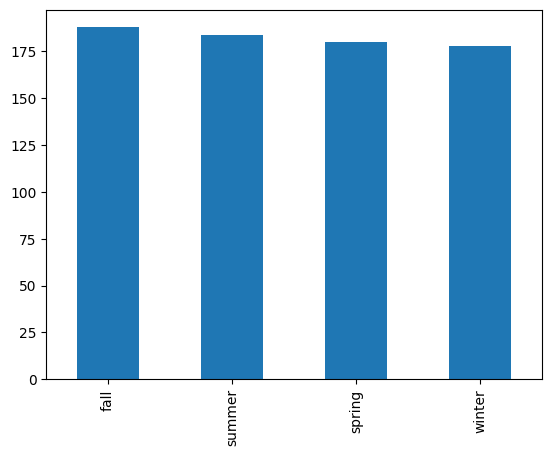

In [404]:
bike_sharing_df.season.value_counts().plot.bar()

<AxesSubplot: >

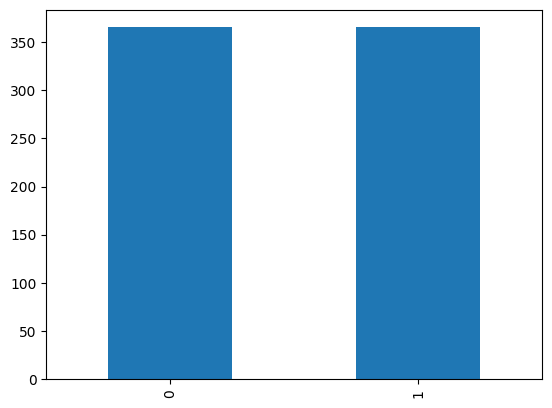

In [405]:
bike_sharing_df.year.value_counts().plot.bar()

<AxesSubplot: >

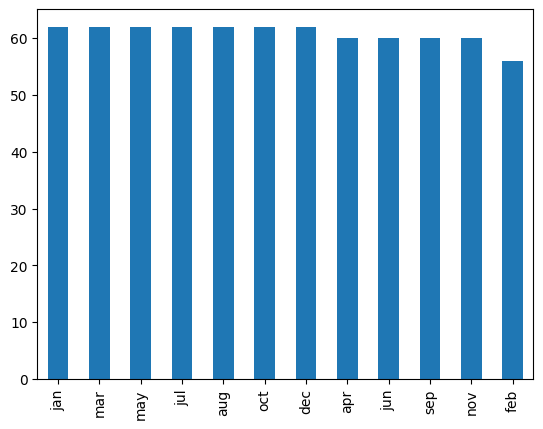

In [406]:
bike_sharing_df.month.value_counts().plot.bar()

<AxesSubplot: >

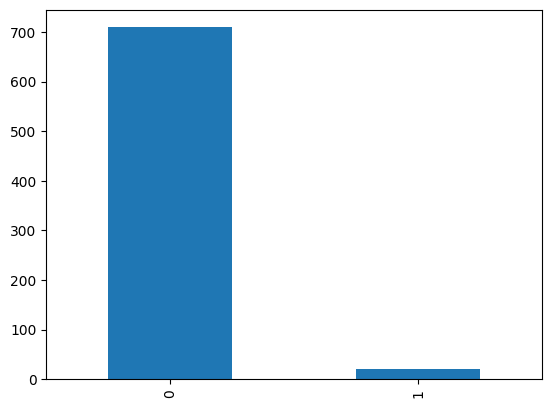

In [407]:
bike_sharing_df.holiday.value_counts().plot.bar()

<AxesSubplot: >

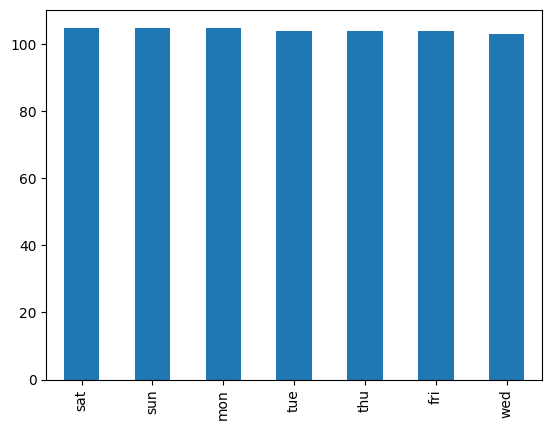

In [408]:
bike_sharing_df.weekday.value_counts().plot.bar()

<AxesSubplot: >

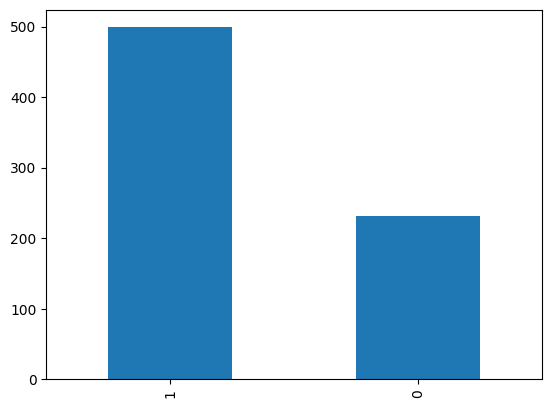

In [409]:
bike_sharing_df.workingday.value_counts().plot.bar()

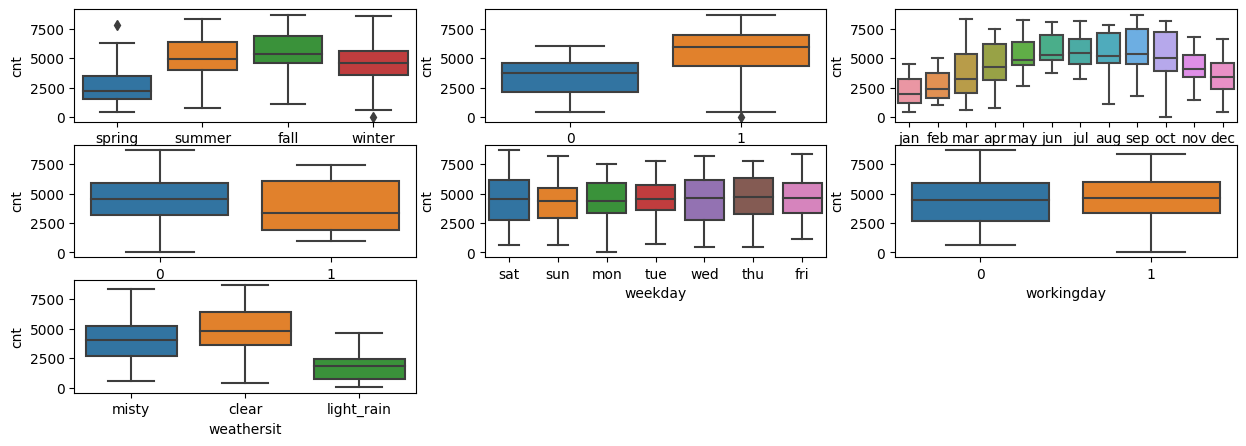

In [448]:
layout_col = 3
categorical_vars_list = ['season','year','month','holiday','weekday','workingday','weathersit']
row = len(categorical_vars_list)
plt.figure(figsize=(15,12))
for index in list(enumerate(categorical_vars_list)):
    plt.subplot(row, layout_col, index[0]+1)
    sns.boxplot(x=index[1], y='cnt',data=bike_sharing_df)
plt.show()

### Quantitative variables

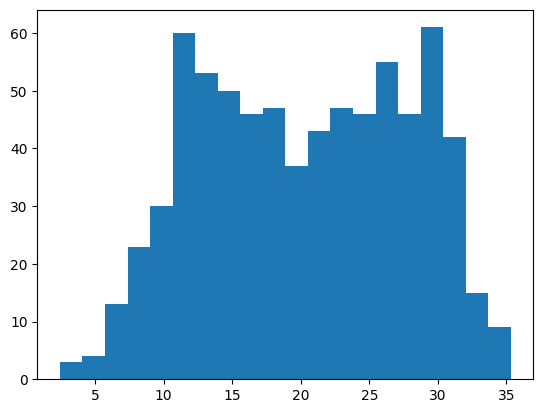

In [410]:
plt.hist(bike_sharing_df.temp,bins=20)
plt.show()

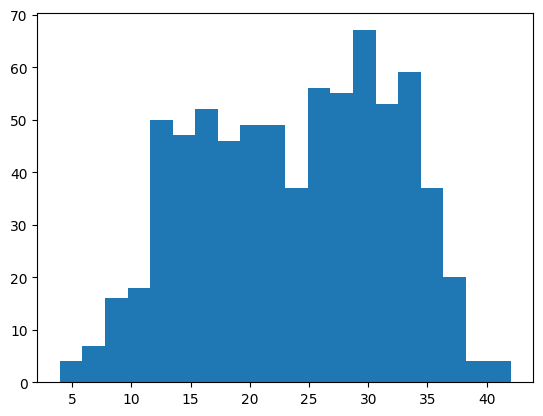

In [411]:
plt.hist(bike_sharing_df.atemp,bins=20)
plt.show()

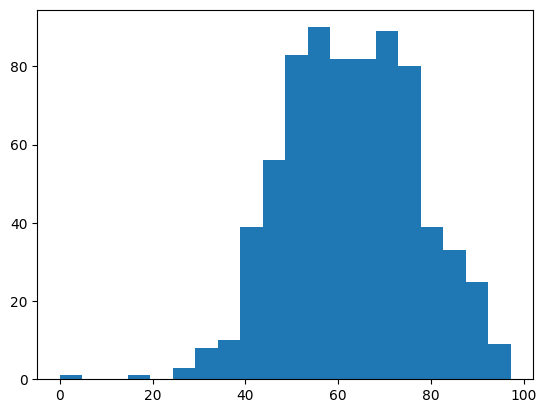

In [412]:
plt.hist(bike_sharing_df.humidity,bins=20)
plt.show()

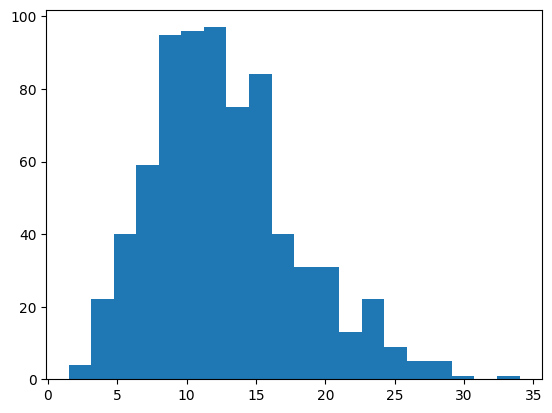

In [413]:
plt.hist(bike_sharing_df.windspeed,bins=20)
plt.show()

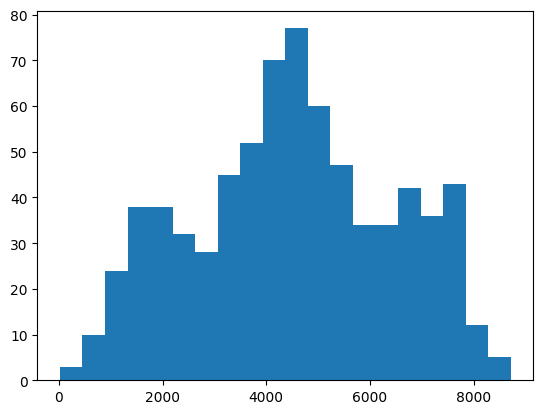

In [414]:
plt.hist(bike_sharing_df.cnt,bins=20)
plt.show()

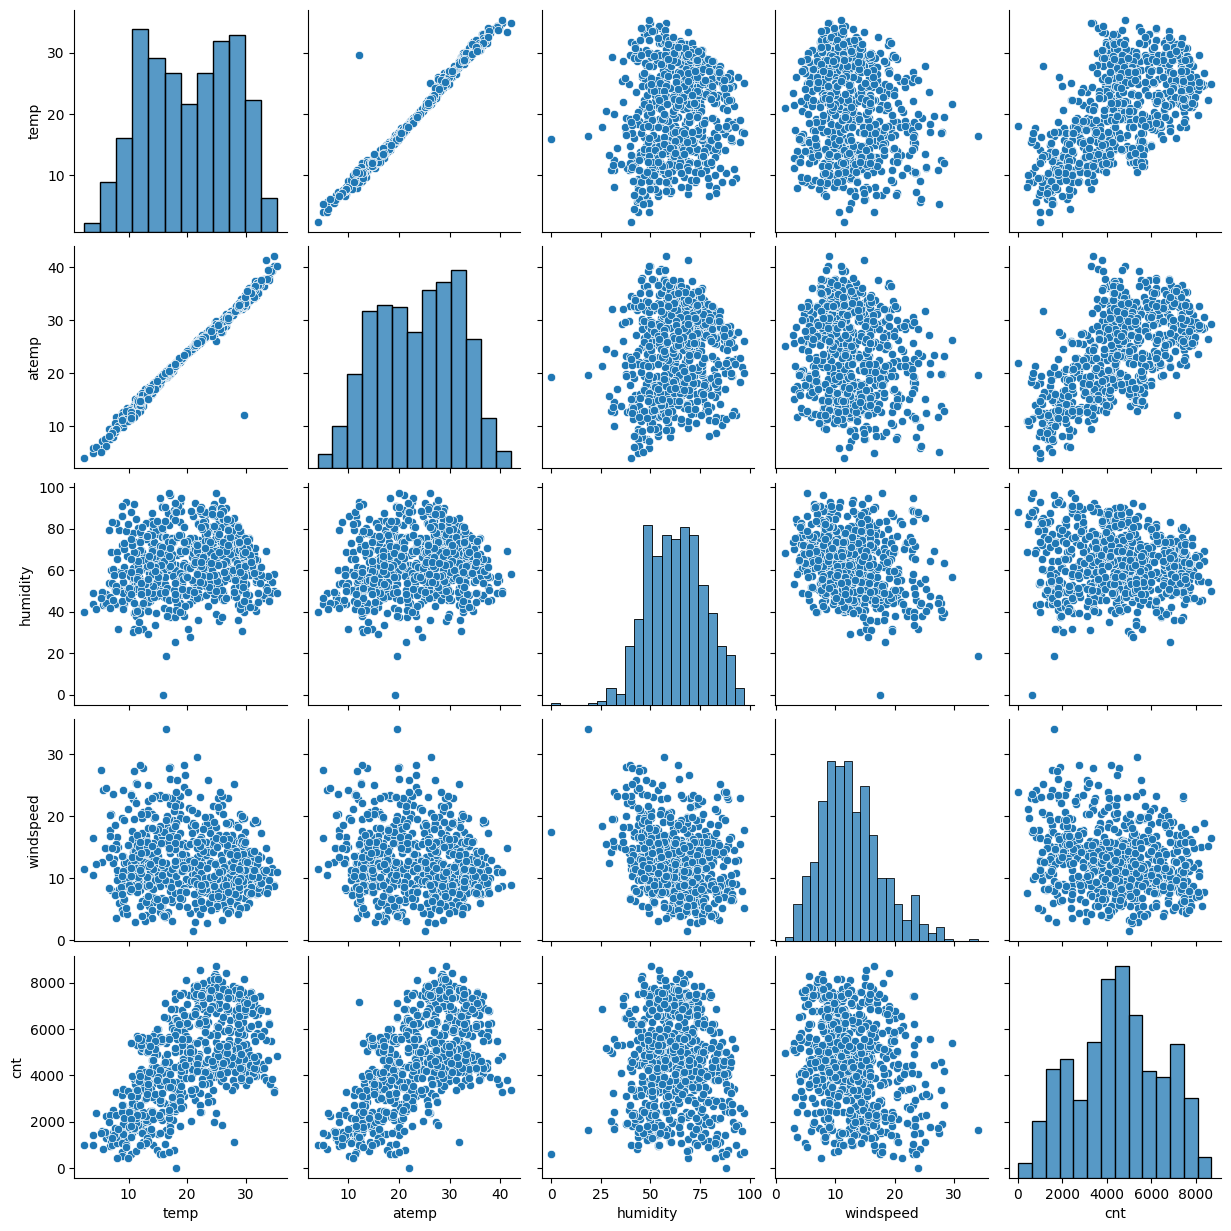

In [449]:
sns.pairplot(data=bike_sharing_df, vars=numerical_variables)
plt.show()

#### Correlation Matrix

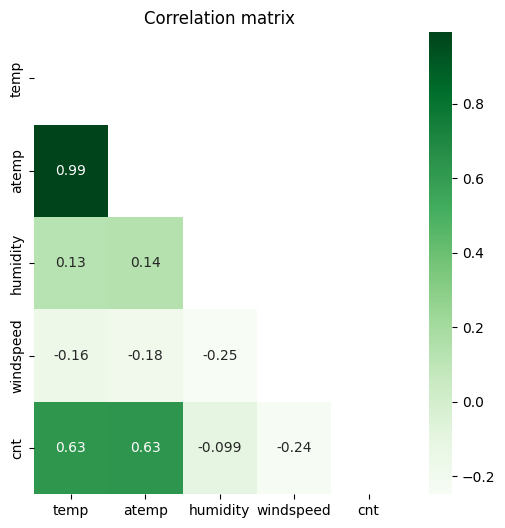

In [415]:
numerical_variables = ['temp','atemp','humidity','windspeed','cnt']
plt.figure(figsize = (6,6))
matrix = np.triu(bike_sharing_df[numerical_variables].corr())
sns.heatmap(bike_sharing_df[numerical_variables].corr(), annot = True, cmap="Greens", mask=matrix)
plt.title("Correlation matrix")
plt.show()

High correlation between temp and atemp

## Data preparation

### Splitting data

In [416]:
dummy_columns = ['season','month','weekday', 'weathersit']
bike_sharing_dummy_df = pd.get_dummies(bike_sharing_df, columns = dummy_columns, drop_first=True)
# train_set_dummy_df.drop(dummy_columns, axis=1, inplace=True)
bike_sharing_dummy_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [417]:
#Splitting data as train set and test set
train_set_dummy_df, test_set_dummy_df = train_test_split(bike_sharing_dummy_df, test_size=0.2, random_state=42)
print(train_set_dummy_df.shape)
print(test_set_dummy_df.shape)

(584, 30)
(146, 30)


In [418]:
train_set_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 247 to 102
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   584 non-null    int64  
 1   holiday                584 non-null    int64  
 2   workingday             584 non-null    int64  
 3   temp                   584 non-null    float64
 4   atemp                  584 non-null    float64
 5   humidity               584 non-null    float64
 6   windspeed              584 non-null    float64
 7   cnt                    584 non-null    int64  
 8   season_spring          584 non-null    uint8  
 9   season_summer          584 non-null    uint8  
 10  season_winter          584 non-null    uint8  
 11  month_aug              584 non-null    uint8  
 12  month_dec              584 non-null    uint8  
 13  month_feb              584 non-null    uint8  
 14  month_jan              584 non-null    uint8  
 15  mont

### Scaling

In [419]:
scaler = MinMaxScaler()
train_set_dummy_df[numerical_variables] = scaler.fit_transform(train_set_dummy_df[numerical_variables] )

In [420]:
train_set_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 247 to 102
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   584 non-null    int64  
 1   holiday                584 non-null    int64  
 2   workingday             584 non-null    int64  
 3   temp                   584 non-null    float64
 4   atemp                  584 non-null    float64
 5   humidity               584 non-null    float64
 6   windspeed              584 non-null    float64
 7   cnt                    584 non-null    float64
 8   season_spring          584 non-null    uint8  
 9   season_summer          584 non-null    uint8  
 10  season_winter          584 non-null    uint8  
 11  month_aug              584 non-null    uint8  
 12  month_dec              584 non-null    uint8  
 13  month_feb              584 non-null    uint8  
 14  month_jan              584 non-null    uint8  
 15  mont

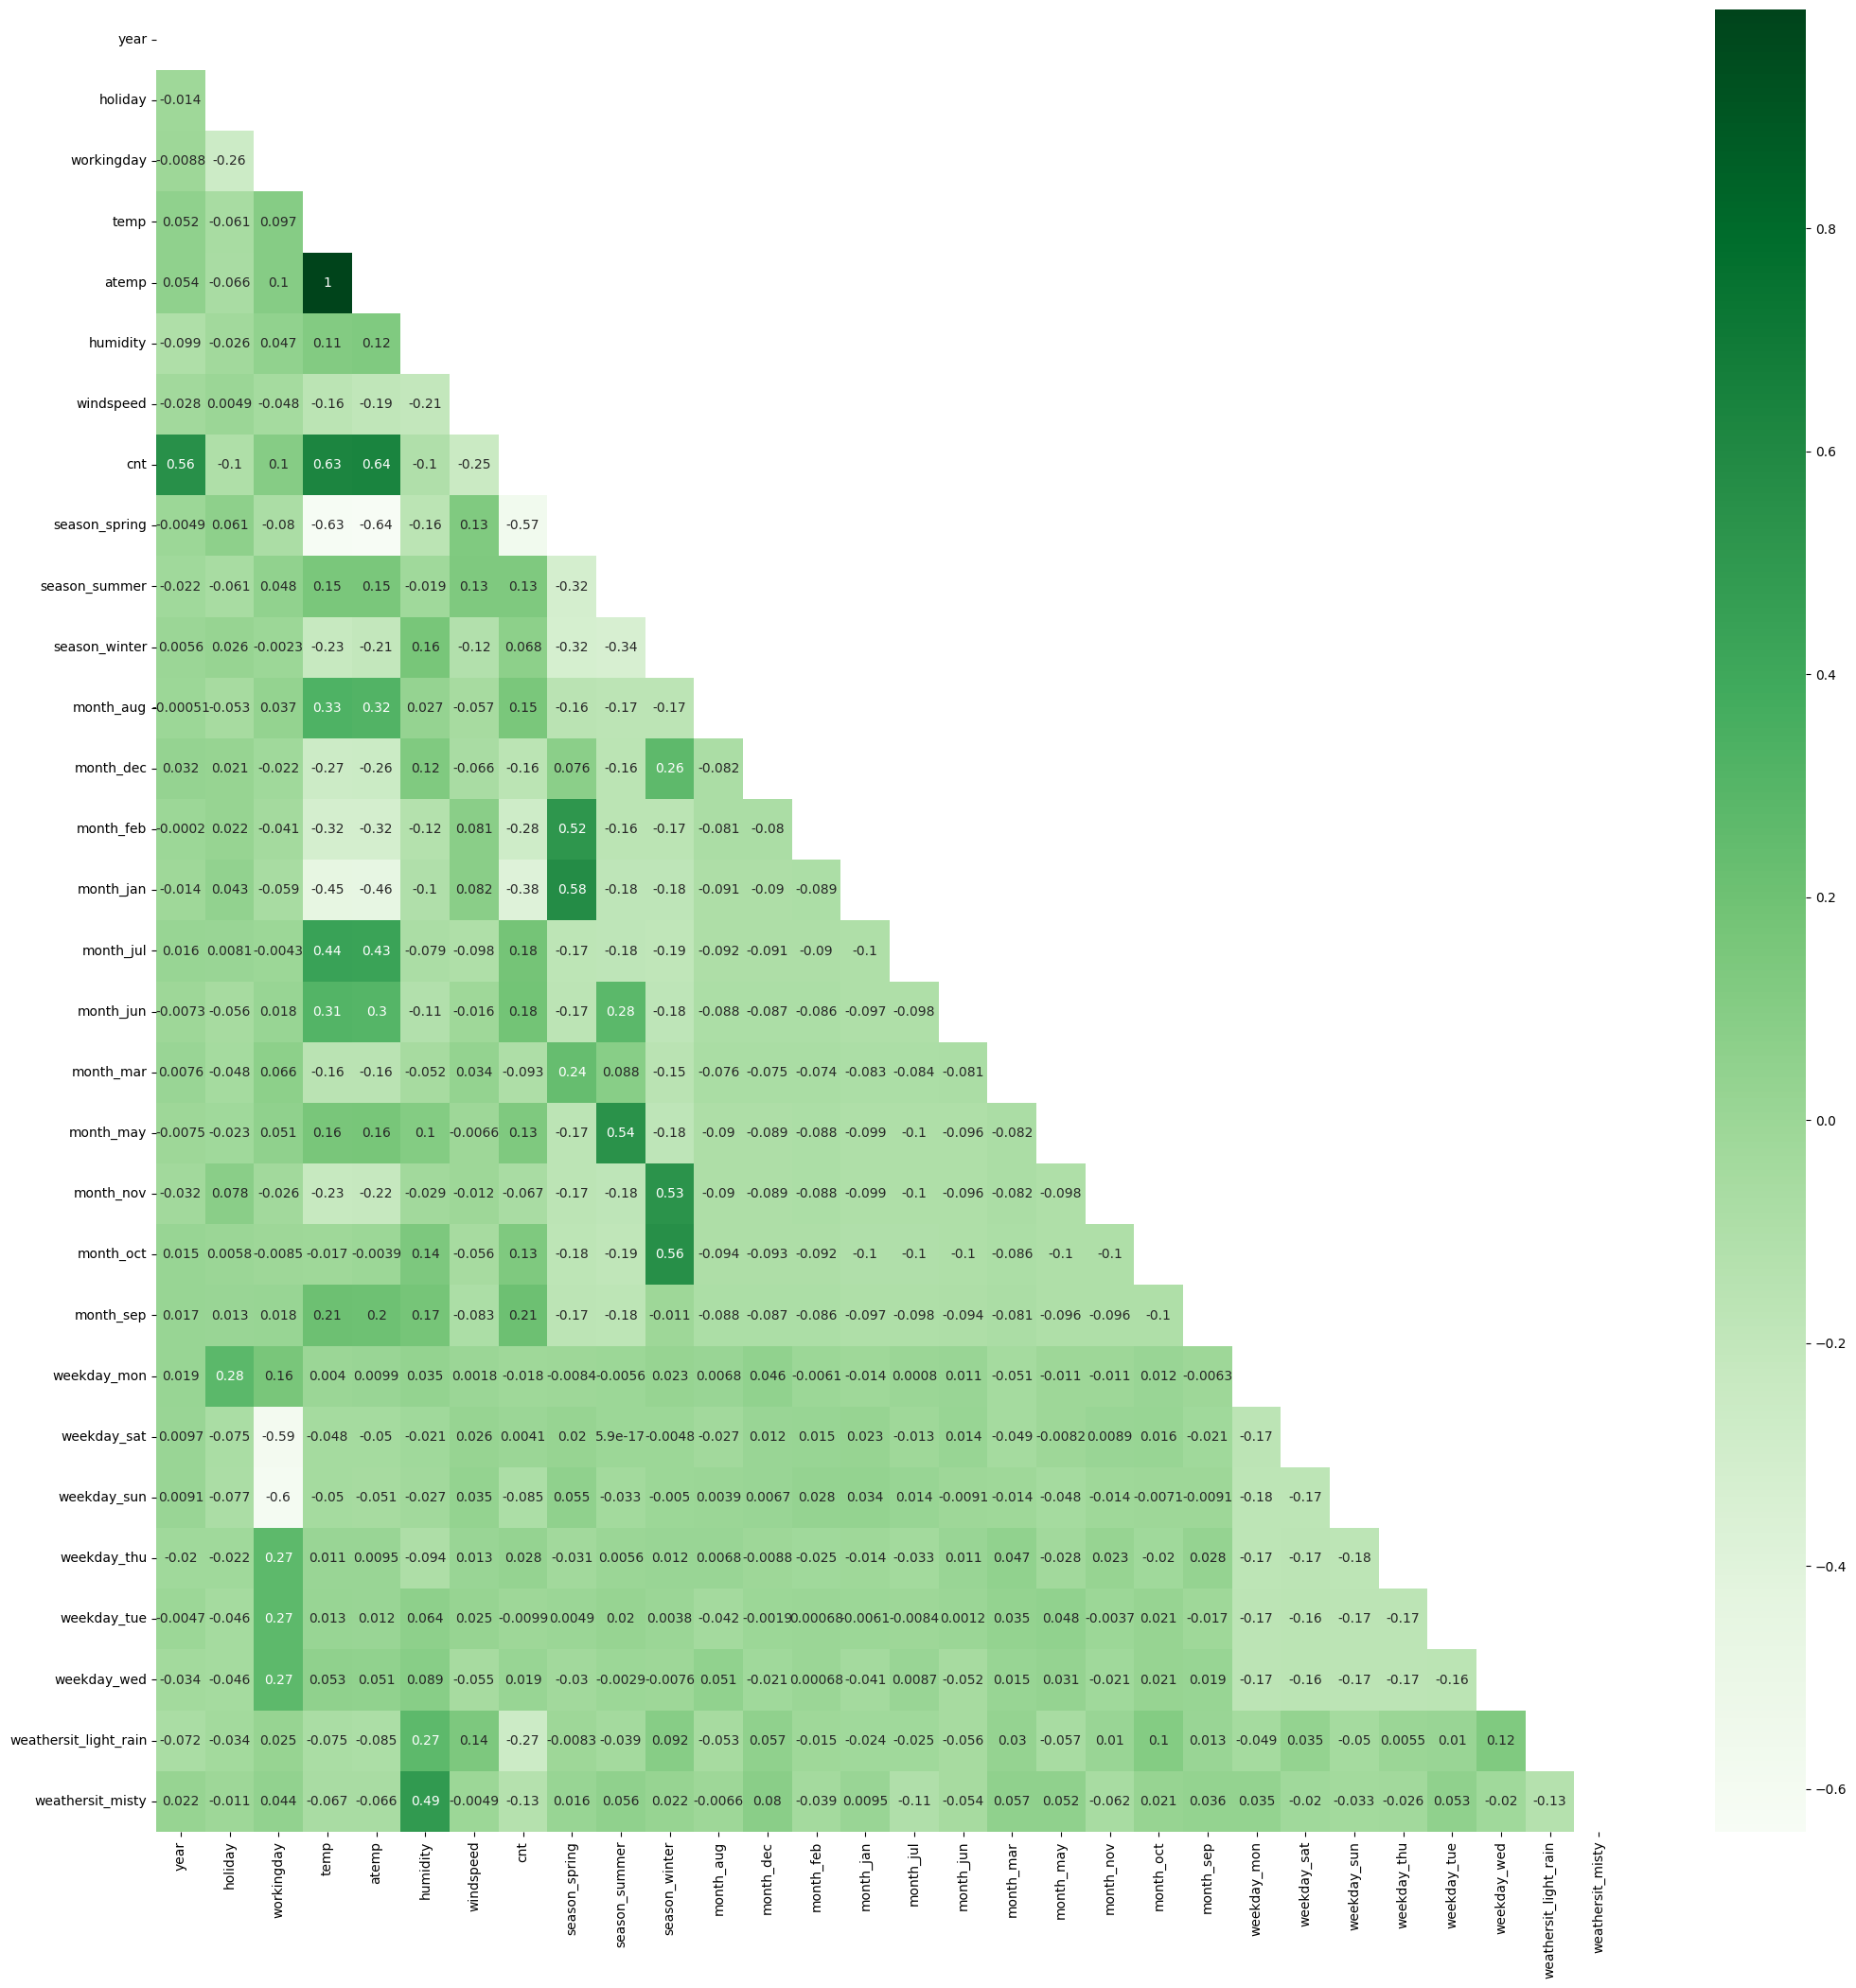

In [421]:
plt.figure(figsize = (25,25))
matrix = np.triu(train_set_dummy_df.corr())
sns.heatmap(train_set_dummy_df.corr(), annot=True, cmap="Greens", mask=matrix)
plt.show()

In [422]:
train_model_set_df = train_set_dummy_df.copy()
train_set_y_df = train_model_set_df.pop('cnt')
train_set_x_df = train_model_set_df

In [423]:

linear_regression_model = LinearRegression()
linear_regression_model.fit(train_set_x_df, train_set_y_df)

rfe = RFE(linear_regression_model,step = 15)
rfe = rfe.fit(train_set_x_df,train_set_y_df)
list(zip(train_set_x_df.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('month_aug', False, 2),
 ('month_dec', False, 2),
 ('month_feb', False, 2),
 ('month_jan', False, 2),
 ('month_jul', False, 2),
 ('month_jun', False, 2),
 ('month_mar', False, 2),
 ('month_may', False, 2),
 ('month_nov', True, 1),
 ('month_oct', False, 2),
 ('month_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_light_rain', True, 1),
 ('weathersit_misty', False, 2)]

In [424]:
cols = train_set_x_df.columns[rfe.support_]

In [425]:
vif_data_df = train_set_x_df[cols]
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                 features     vif
4                   atemp  174.89
3                    temp  174.30
2              workingday   44.97
12            weekday_sun   10.83
11            weekday_sat   10.14
1                 holiday    3.13
7           season_spring    2.77
8           season_winter    2.08
9               month_nov    1.50
5                humidity    1.26
6               windspeed    1.21
13  weathersit_light_rain    1.17
10              month_sep    1.09
0                    year    1.02


In [426]:
train_x_lm_one = sm.add_constant(vif_data_df)
lr_one = sm.OLS(train_set_y_df, train_x_lm_one).fit()
print(lr_one.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          6.77e-204
Time:                        21:26:25   Log-Likelihood:                 547.48
No. Observations:                 584   AIC:                            -1067.
Df Residuals:                     570   BIC:                            -1006.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [427]:
vif_data_df = vif_data_df.drop(["atemp"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                 features    vif
2              workingday  44.15
11            weekday_sun  10.67
10            weekday_sat   9.99
1                 holiday   3.12
6           season_spring   2.76
3                    temp   2.75
7           season_winter   2.06
8               month_nov   1.50
4                humidity   1.24
12  weathersit_light_rain   1.15
5               windspeed   1.14
9               month_sep   1.08
0                    year   1.02


In [428]:
train_x_lm_two = sm.add_constant(vif_data_df)
lr_two = sm.OLS(train_set_y_df, train_x_lm_two).fit()
print(lr_two.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.69e-204
Time:                        21:26:25   Log-Likelihood:                 545.63
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     571   BIC:                            -1008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [429]:
vif_data_df = vif_data_df.drop(["workingday"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                 features    vif
3                humidity  15.36
2                    temp  11.23
4               windspeed   4.89
6           season_winter   2.47
5           season_spring   2.42
0                    year   2.05
7               month_nov   1.59
10            weekday_sun   1.23
9             weekday_sat   1.21
8               month_sep   1.17
11  weathersit_light_rain   1.15
1                 holiday   1.06


In [430]:
train_x_lm_three = sm.add_constant(vif_data_df)
lr_three = sm.OLS(train_set_y_df, train_x_lm_three).fit()
print(lr_three.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          2.69e-204
Time:                        21:26:26   Log-Likelihood:                 545.63
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     571   BIC:                            -1008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.42

In [431]:
vif_data_df = vif_data_df.drop(["humidity"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                 features   vif
3               windspeed  4.74
2                    temp  4.23
0                    year  2.05
5           season_winter  1.89
4           season_spring  1.66
6               month_nov  1.59
9             weekday_sun  1.23
8             weekday_sat  1.21
7               month_sep  1.16
10  weathersit_light_rain  1.08
1                 holiday  1.06


In [432]:
train_x_lm_four = sm.add_constant(vif_data_df)
lr_four = sm.OLS(train_set_y_df, train_x_lm_four).fit()
print(lr_four.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          9.00e-191
Time:                        21:26:27   Log-Likelihood:                 510.90
No. Observations:                 584   AIC:                            -997.8
Df Residuals:                     572   BIC:                            -945.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [433]:
vif_data_df = vif_data_df.drop(["weekday_sat"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                features   vif
3              windspeed  4.70
2                   temp  4.19
0                   year  2.05
5          season_winter  1.89
4          season_spring  1.64
6              month_nov  1.59
8            weekday_sun  1.19
7              month_sep  1.16
9  weathersit_light_rain  1.08
1                holiday  1.06


In [434]:
train_x_lm_five = sm.add_constant(vif_data_df)
lr_five = sm.OLS(train_set_y_df, train_x_lm_five).fit()
print(lr_five.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     226.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          9.84e-192
Time:                        21:26:28   Log-Likelihood:                 510.36
No. Observations:                 584   AIC:                            -998.7
Df Residuals:                     573   BIC:                            -950.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [435]:
vif_data_df = vif_data_df.drop(["month_nov"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                features   vif
3              windspeed  4.63
2                   temp  4.14
0                   year  2.05
4          season_spring  1.64
5          season_winter  1.35
7            weekday_sun  1.19
6              month_sep  1.15
8  weathersit_light_rain  1.08
1                holiday  1.05


In [436]:
train_x_lm_six = sm.add_constant(vif_data_df)
lr_six = sm.OLS(train_set_y_df, train_x_lm_six).fit()
print(lr_six.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          8.24e-192
Time:                        21:26:28   Log-Likelihood:                 507.69
No. Observations:                 584   AIC:                            -995.4
Df Residuals:                     574   BIC:                            -951.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [437]:
lr_six.params

const                    0.246284
year                     0.230877
holiday                 -0.086193
temp                     0.414769
windspeed               -0.102640
season_spring           -0.130526
season_winter            0.047711
month_sep                0.054966
weekday_sun             -0.042248
weathersit_light_rain   -0.257652
dtype: float64

#### Normality of errors terms

<AxesSubplot: ylabel='Count'>

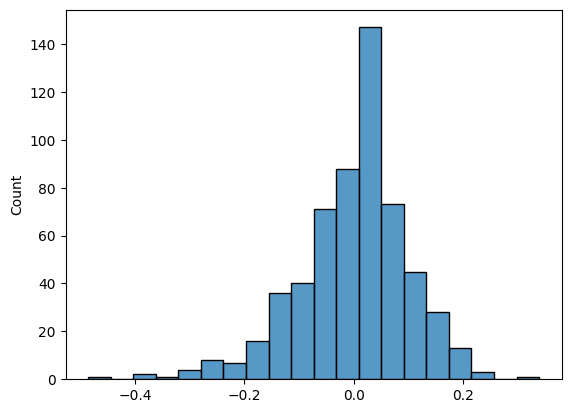

In [450]:
train_y_prediction = lr_six.predict(train_x_lm_six)
fig = plt.figure()
sns.histplot((train_set_y_df - train_y_prediction), bins = 20)

Error terms have a normal distribution

#### Multi-colinearity

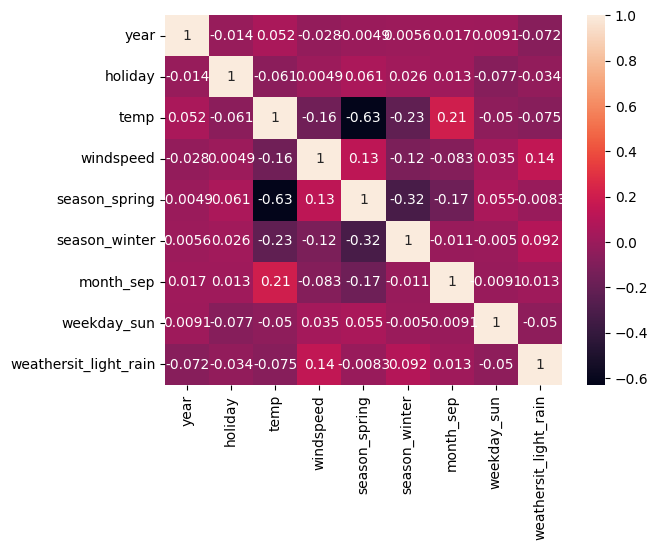

In [452]:
plt.figure()
sns.heatmap(vif_data_df.corr(), annot=True)
plt.show()

No multi-colinearity as per heatmap

In [453]:
# vif_data_df = vif_data_df.drop(["month_nov"], axis =1)
vif_df= pd.DataFrame()
vif_df['features'] = vif_data_df.columns
vif_df['vif'] = [variance_inflation_factor(vif_data_df.values, i) for i in range(vif_data_df.shape[1])]
vif_df['vif'] = round(vif_df['vif'],2)
vif_df.sort_values(by='vif',ascending=False, inplace=True)
print(vif_df)

                features   vif
3              windspeed  4.63
2                   temp  4.14
0                   year  2.05
4          season_spring  1.64
5          season_winter  1.35
7            weekday_sun  1.19
6              month_sep  1.15
8  weathersit_light_rain  1.08
1                holiday  1.05


VIF values are < 5

### Making predictions

In [439]:
test_set_dummy_df[numerical_variables] = scaler.transform(test_set_dummy_df[numerical_variables])
test_set_dummy_df.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_misty
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.452055,0.013699,0.726027,0.513327,0.486680,0.617324,0.461923,0.498457,0.315068,0.260274,...,0.041096,0.068493,0.130137,0.143836,0.116438,0.123288,0.157534,0.150685,0.013699,0.308219
std,0.499409,0.116637,0.447530,0.229925,0.217533,0.143761,0.214336,0.213583,0.466142,0.440294,...,0.199195,0.253460,0.337612,0.352131,0.321854,0.329899,0.365558,0.358973,0.116637,0.463347
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.062226,0.142775,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.317742,0.306197,0.516316,0.294317,0.310084,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.483409,0.471301,0.601975,0.445562,0.503164,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.723272,0.677047,0.714815,0.547829,0.665526,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.960541,0.939531,1.002146,1.213032,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [440]:
test_set_y_df = test_set_dummy_df.pop('cnt')
test_set_x_df = test_set_dummy_df


In [441]:
# test_vif_data_df = vif_data_df.copy()
# test_vif_data_df.drop(['season_spring','season_winter','month_sep','weekday_sun','weathersit_light_rain'], axis=1, inplace=True)

In [442]:
vif_cols = vif_data_df.columns
test_set_x_df = test_set_x_df[vif_cols]
test_x_lm_six = sm.add_constant(test_set_x_df)
test_y_pred = lr_six.predict(test_x_lm_six)

In [444]:
r2 = r2_score(test_set_y_df, test_y_pred)
round(r2,4)

0.817

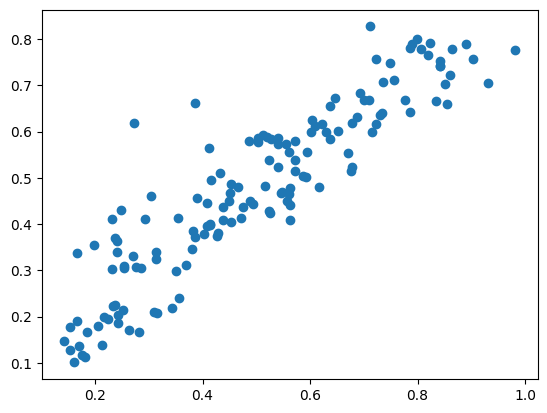

In [445]:
fig = plt.figure()
plt.scatter(test_set_y_df, test_y_pred)

In [446]:
round(lr_six.params, 4)

const                    0.2463
year                     0.2309
holiday                 -0.0862
temp                     0.4148
windspeed               -0.1026
season_spring           -0.1305
season_winter            0.0477
month_sep                0.0550
weekday_sun             -0.0422
weathersit_light_rain   -0.2577
dtype: float64

In [447]:
adjusted_r2 = round(1-(1-r2)*(test_set_x_df.shape[0]-1)/(test_set_x_df.shape[0]-test_set_x_df.shape[1]-1),4)
print(adjusted_r2)

0.8049


#### Train dataset r^2: 0.796
#### Test dataset r^2: 0.817
#### Train dataset adjusted r^2: 0.793
#### Test dataset adjusted r^2: 0.8049

Bike demand is based on temperature, weather and year